# Initial data exploration

In [89]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

In [90]:
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = mpimg.imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict

In [91]:
# images are divided up into vehicles and non-vehicles
non_vehicles_image_names = glob.glob('./training_dataset/non-vehicles/*/*.png')
vehicles_image_names = glob.glob('./training_dataset/vehicles/*/*.png')

Your function returned a count of 8792  cars and 8968  non-cars
of size:  (64, 64, 3)  and data type: float32


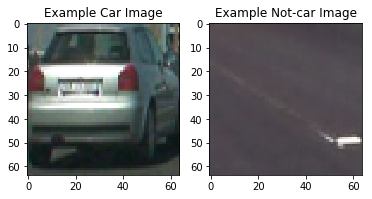

In [92]:
data_info = data_look(vehicles_image_names, non_vehicles_image_names)

print('Your function returned a count of', 
      data_info["n_cars"], ' cars and', 
      data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])
# Just for fun choose random car / not-car indices and plot example images   
car_ind = np.random.randint(0, len(vehicles_image_names))
notcar_ind = np.random.randint(0, len(non_vehicles_image_names))

# Read in car / not-car images
car_image = mpimg.imread(vehicles_image_names[car_ind])
notcar_image = mpimg.imread(non_vehicles_image_names[notcar_ind])

# Plot the examples
plt.figure()
plt.subplot(121)
plt.imshow(car_image)
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(notcar_image)
plt.title('Example Not-car Image')
plt.show()

In [93]:
training_image_names = non_vehicles_image_names + vehicles_image_names

print('total number of images = ', len(training_image_names))
print(len(non_vehicles_image_names) + len(vehicles_image_names), ' = ', len(non_vehicles_image_names), ' + ', len(vehicles_image_names))

total number of images =  17760
17760  =  8968  +  8792


In [94]:
non_vehicle_type = [0] * len(non_vehicles_image_names)
vehicle_type = [1] * len(vehicles_image_names)

training_image_type = non_vehicle_type + vehicle_type

print('non-vehicle image type is:', non_vehicle_type[0])
print('vehicle image type is:', vehicle_type[0])

print(len(non_vehicle_type), ' = ', len(non_vehicles_image_names))
print(len(vehicle_type), ' = ', len(vehicles_image_names))
print(len(training_image_type), ' = ', len(training_image_names))

non-vehicle image type is: 0
vehicle image type is: 1
8968  =  8968
8792  =  8792
17760  =  17760


# Split 70% training 20% validation 10% test set

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

training_image_names, training_image_type = shuffle(training_image_names, training_image_type)

X_train, X_test, y_train, y_test = train_test_split(training_image_names, training_image_type, test_size=0.1, random_state=1)

X_test, y_test = shuffle(X_test, y_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train, y_train = shuffle(X_train, y_train)
X_val, y_val = shuffle(X_val, y_val)

print(len(training_image_names), ' = ', len(X_train) + len(X_val) + len(X_test), ' = ', len(X_train), ' + ', len(X_val), ' + ', len(X_test))
print(len(training_image_type), ' = ', len(y_train) + len(y_val) + len(y_test), ' = ', len(y_train), ' + ', len(y_val), ' + ', len(y_test))

print(training_image_names[0])
print(X_train[0])
print(X_val[0])
print(X_test[0])

17760  =  17760  =  12787  +  3197  +  1776
17760  =  17760  =  12787  +  3197  +  1776
./training_dataset/vehicles\GTI_Far\image0542.png
./training_dataset/vehicles\KITTI_extracted\1529.png
./training_dataset/vehicles\KITTI_extracted\1576.png
./training_dataset/non-vehicles\Extras\extra2097.png


# Save the data for easy access

In [96]:
import pickle

pickle_file = './training_data.p'

try:
    with open(pickle_file, 'wb') as pfile:
        pickle.dump(
            {
                'X_train': X_train,
                'y_train': y_train,
                'X_val': X_val,
                'y_val': y_val,
                'X_test': X_test,
                'y_test': y_test
            },
            pfile, pickle.HIGHEST_PROTOCOL)
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise

Saving data to pickle file...
Data saved to pickle file.


# Further data exploration

Confirm data are correctly saved

In [97]:
data_file = './training_data.p'
with open(data_file, mode='rb') as f:
    data = pickle.load(f)
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

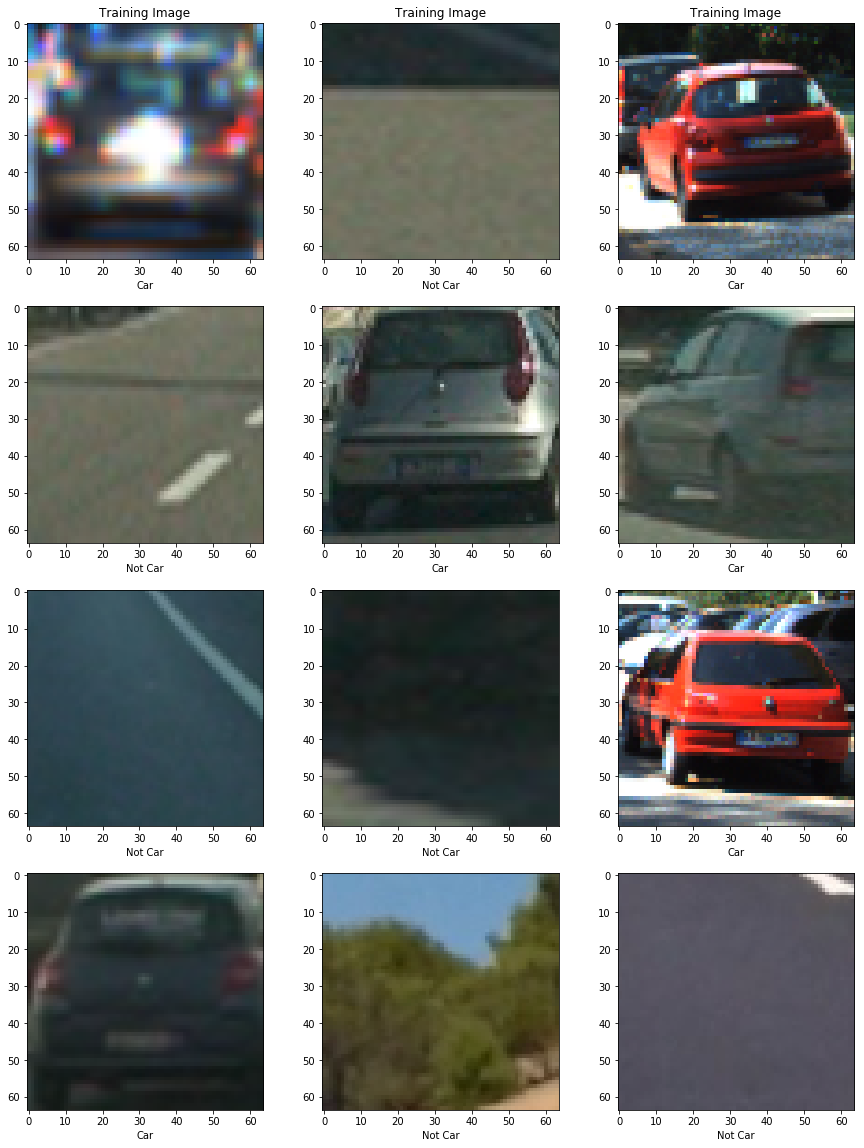

In [98]:
plt.figure(figsize=(15, 20))

num_plots = 4
num_data_type = 3
images = []
for idx in range(0, num_plots):
    train_ind = np.random.randint(0, len(y_train))
    val_ind = np.random.randint(0, len(y_val))
    test_ind = np.random.randint(0, len(y_test))

    train_image = mpimg.imread(X_train[train_ind])
    val_image = mpimg.imread(X_val[val_ind])
    test_image = mpimg.imread(X_test[test_ind])
    
    plt.subplot(num_plots, num_data_type, idx*num_data_type+1)
    plt.imshow(train_image)
    
    if (y_train[train_ind]):
        plt.xlabel("Car")
    else:
        plt.xlabel("Not Car")
        
    if (idx == 0):
        plt.title("Training Image")

    plt.subplot(num_plots, num_data_type, idx*num_data_type+2)
    plt.imshow(val_image)
    
    if (y_val[val_ind]):
        plt.xlabel("Car")
    else:
        plt.xlabel("Not Car")
        
    if (idx == 0):
        plt.title("Training Image")
        
    plt.subplot(num_plots, num_data_type, idx*num_data_type+3)
    plt.imshow(test_image)
    
    if (y_test[test_ind]):
        plt.xlabel("Car")
    else:
        plt.xlabel("Not Car")
        
    if (idx == 0):
        plt.title("Training Image")

plt.show()